#### Parameters Of Bicycle Model -
##### delta (Steering Angle) : randomly generated
##### theta (heading angle) : dependant on delta
##### velocity : acceleration dependant (constant acceleration has been taken in the first 4 plots)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import plotly.express as px

# Heading angle will change w.r.t. the previous position, original heading and steering angle. 
# Let the previous conditions be called as the previous state.
# Initial heading_angle (theta) with which the vehicle starts moving. 
# Assuming slip angle in the model to be 0.

# Function for the kinematic bicycle model
def kinematic_bicycle_model(x, y, theta, v, delta, a, L, dt):
    x += v * np.cos(theta) * dt
    y += v * np.sin(theta) * dt
    theta += (v / L) * np.tan(delta) * dt
    v += a * dt
    return x, y, theta, v, a

# Alternate function which includes the factor of slipping angle.
# lr =  Distance from the rear end to the centre of the wheelbase.
# lf =  Distance from the front end to the centre of the wheelbase.
def kinematic_bicycle_model_w_slip(x, y, theta, v, delta, a, L, lr, dt):
    lf = L - lr
    beta = a * np.tan(lr/(lr+lf) * np.tan(delta))
    x += v * np.cos(theta + beta) * dt
    y += v * np.sin(theta + beta) * dt
    theta += (v / L) * np.cos(beta) * np.tan(delta) * dt
    v += a * dt
    return x, y, theta, v, a

In [56]:
def start_trajectory(v_init, theta_init = 0.0, a = 0.0, delta_init = 0.0, x_init = 0.0, y_init = 0.0, mode = "simple") :
    # Initial State
    # x_init, y_init = 0.0, 0.0  # Initial position
    # Ideally, theta_init can be any angle between -90 to +90 degrees. Out of this range, the movement of the vehicle is least possible. 
    # v_init = 0.0  # Initial velocity
    given_delta = delta_init
    # Parameters
    L = 5 # Wheelbase
    dt = 0.1  # Time step
    t_end = 10  # 10 seconds
    t = np.arange(0, t_end, dt)
    
    # Delta toh har time instant dt par change hoga.
    x, y, theta, v = x_init, y_init, theta_init, v_init
    x_traj, y_traj, theta_traj, v_traj = [], [], [], []
    # Appending the initial state (same for all paths) to the trajectory lists.
    x_traj.append(x_init)
    y_traj.append(y_init)
    theta_traj.append(theta_init)
    v_traj.append(v_init)
    
    for _ in t:
        x, y, theta, v, a = kinematic_bicycle_model(x, y, theta, v, delta_init, a, L, dt)
        # Modifying delta (steering angle)
        if (mode == "simple"): 
            # Steering angle is such that the vehicle always move forward i.e. Steering angle ∈ [-1, +1] radian
            delta_init = random.uniform(-1, 1)
        elif (mode == "complex"):
            # Only case other than "simple"
            # Steering angle can be in such a way which reverses the direction of the vehicle i.e. Steering angle ∈ [-π, +π]
            delta_init = np.pi * random.uniform(-1, 1)
        # a = a * random.uniform(-1, 1)
        # Comment out the above line if the effect of variable acceleration is to be neglected.
        x_traj.append(x)
        y_traj.append(y)
        theta_traj.append(theta)
        v_traj.append(v)
    
    # # Printing x, y coordinates of the final trajectory; this shows that all the trajectories start from the same initial point.
    # print("Printing x, y coordinates of the final trajectory; this shows that all the trajectories start from the same initial point.")
    # for i in range(len(x_traj)):
    #     print (theta_traj[i], end = " ")
    #     # print ("({}, {})".format(x_traj[i], y_traj[i]), end = " ")
    # print()
    return x_traj, y_traj, theta_init, given_delta, a, v_traj

Simplest Kinematic Bicycle Model with θi = 0, δi = 0, a = 0 : 
Using simple_kinematic_bicycle_model so that always a fwd motion is observed i.e. keeping steering angle between -1 to +1 radians

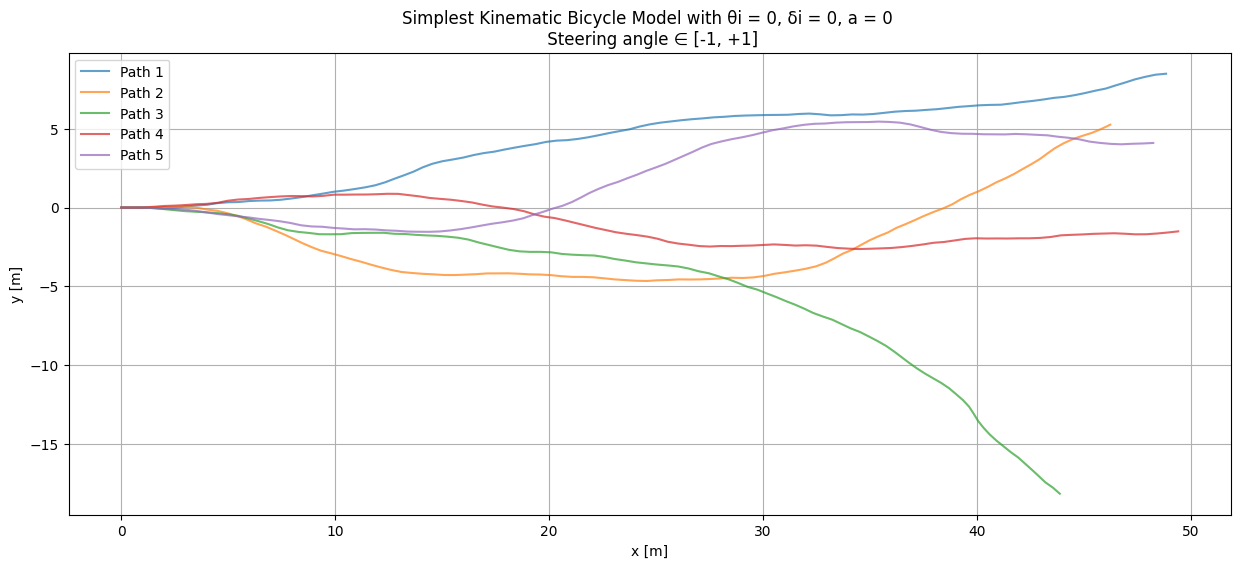

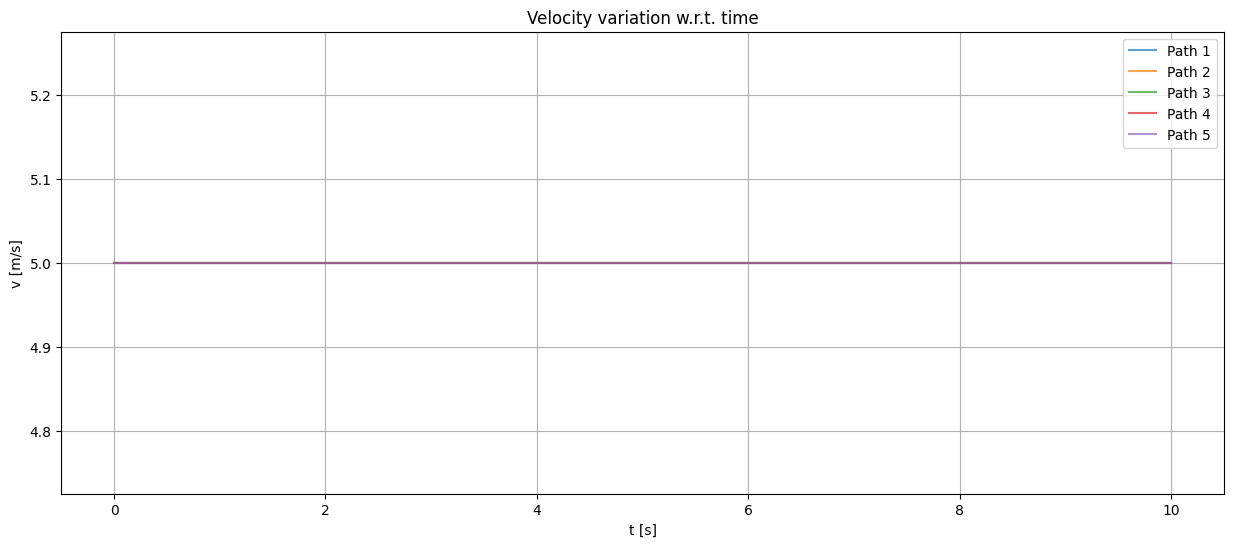

In [57]:
# Making 5 possible trajectories
trajectories = []
for i in range(5):
    x_traj, y_traj, theta_init, delta_init, a, v_traj = start_trajectory(theta_init=0.0, a=0.0, delta_init=0.0, v_init=5, mode="simple")
    trajectories.append((x_traj, y_traj, theta_init, delta_init, a, v_traj))


# Create a DataFrame for plotting
data = []
for i, (x_traj, y_traj, theta_init, delta_init, a, v_traj) in enumerate(trajectories):
    for x, y, v in zip(x_traj, y_traj, v_traj):
        data.append({"x": x, "y": y, "v": v, "path": f"Path {i+1}"})
df = pd.DataFrame(data)

# Create the plot
fig = px.line(df, x="x", y="y", color="path", custom_data=["v"], title="Simplest Kinematic Bicycle Model with θi = 0, δi = 0, a = 0 <br>Steering angle ∈ [-1, +1] radian", render_mode="svg")
# Add hover functionality
fig.update_traces(mode="markers+lines", hovertemplate="<br>".join([
    "v: %{customdata[0]:.2f}",
    "x: %{x:.2f}",
    "y: %{y:.2f}"
]))
fig.update_layout(height=600,width=1130)
fig.show()

# Using plt :
plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(x_traj, y_traj, label=f"Path {i+1}", alpha = 0.7)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid("True")
plt.title("Simplest Kinematic Bicycle Model with θi = 0, δi = 0, a = 0 \n Steering angle ∈ [-1, +1]")
plt.legend()
plt.show()

# Using plt to show the velocity variation w.r.t. time :
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, v_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("v [m/s]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Velocity variation w.r.t. time")
plt.legend()
plt.show()

Simplest Kinematic Bicycle Model with non zero initial state: 
Using simple_kinematic_bicycle_model so that always a fwd motion is observed i.e. keeping steering angle between -1 to +1 radians

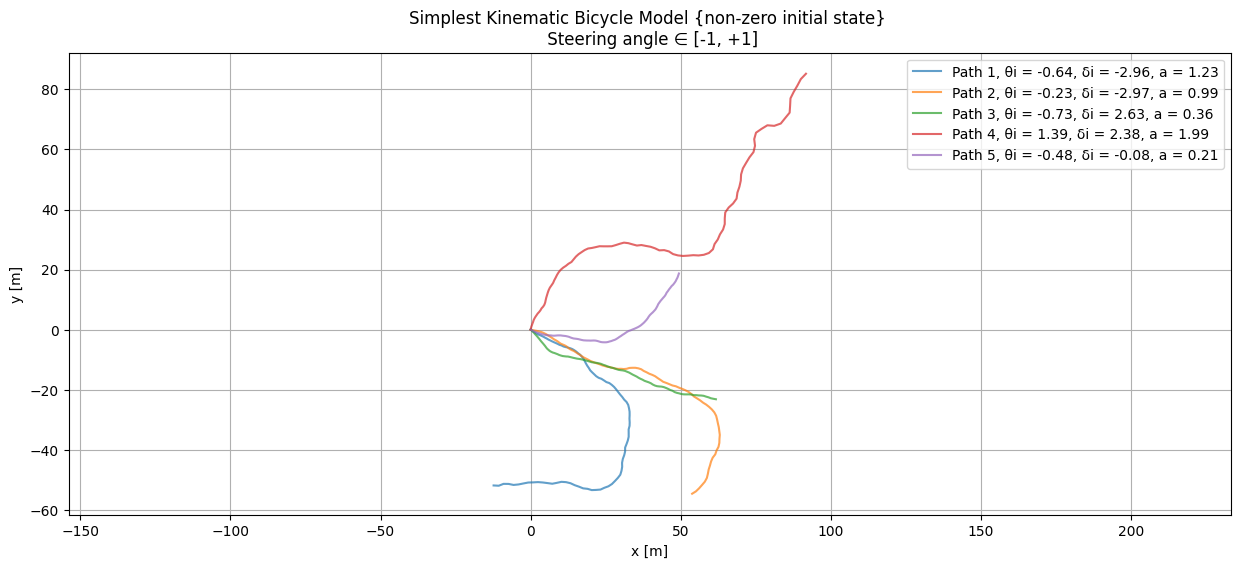

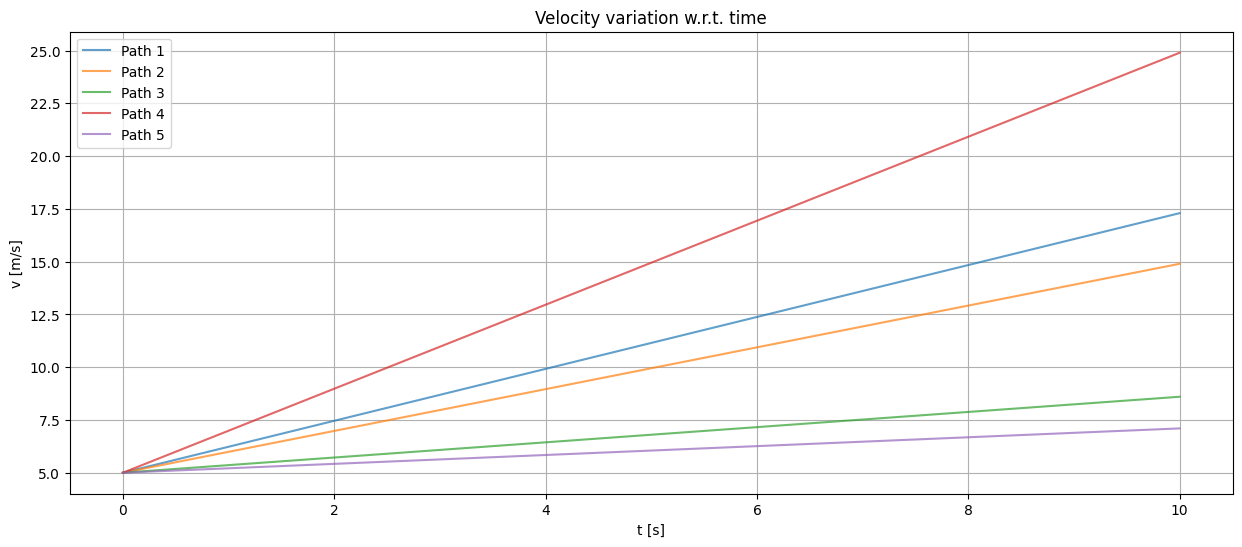

In [58]:
# Making 5 possible trajectories 
trajectories = []
for i in range (5):
    # Passed initial heading angle randomly (any angle b/w -90 to +90 degrees).
    # Passed acceleration; keeping acceleration constant for each trajectory, in a range of 0-2
    # Effect of acc. in the trajectory can be removed by making a = 0.0 
    # Initial delta can be any angle between -180 to +180 degrees.
    (x_traj, y_traj, θi, δi, a, v_traj) = start_trajectory(v_init = 5, theta_init = round(np.pi * random.uniform(-0.5, 0.5), 2), a = round(random.uniform(0, 2), 2), delta_init = round(np.pi * random.uniform(-1, 1), 2), mode = "simple")
    trajectories.append((x_traj, y_traj, θi, δi, a, v_traj))

# Create a DataFrame for plotting
data = []
for i, (x_traj, y_traj, theta_init, delta_init, a, v_traj) in enumerate(trajectories):
    for x, y, v in zip(x_traj, y_traj, v_traj):
        data.append({"x": x, "y": y, "v": v, "path": f"Path {i+1}"})
df = pd.DataFrame(data)

# Creating the plot using plotly.
fig = px.line(df, x="x", y="y", color="path", custom_data=["v"], title="Simplest Kinematic Bicycle Model {non-zero initial state} <br>Steering angle ∈ [-1, +1]", render_mode="svg")
# Adding hover functionality
fig.update_traces(mode="markers+lines", hovertemplate="<br>".join([
    "v: %{customdata[0]:.2f}",
    "x: %{x:.2f}",
    "y: %{y:.2f}"
]))
fig.update_layout(height=600,width=1130)
fig.show()

# Using matplotlib :
plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(x_traj, y_traj, label=f"Path {i+1}, θi = {θi}, δi = {δi}, a = {a}", alpha = 0.7)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid("True")
plt.title("Simplest Kinematic Bicycle Model {non-zero initial state} \n Steering angle ∈ [-1, +1]")
plt.legend()
plt.axis('equal')
plt.show()

# Using plt to show the velocity variation w.r.t. time :
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, v_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("v [m/s]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Velocity variation w.r.t. time")
plt.legend()
plt.show()

Complex Kinematic Bicycle Model with θi = 0, δi = 0, a = 0 : 
Trajectories with constant velocity, initial heading and steering angle as 0; 
But with complex kinematic_bicycle_model methods : kinematic_bicycle_model or kinematic_bicycle_model_w_slip

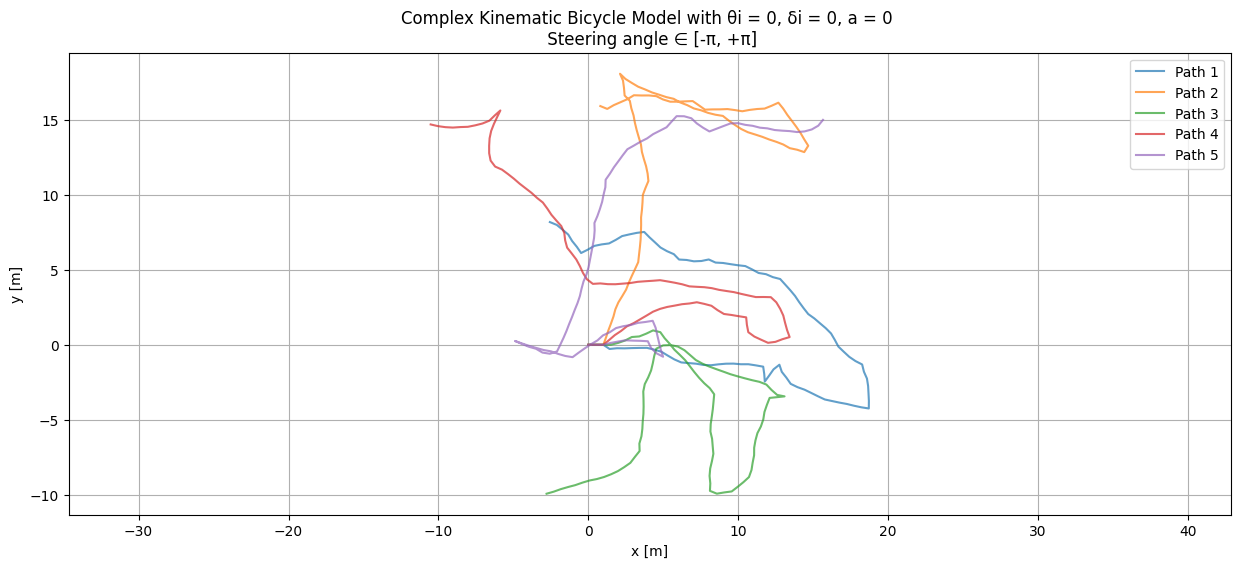

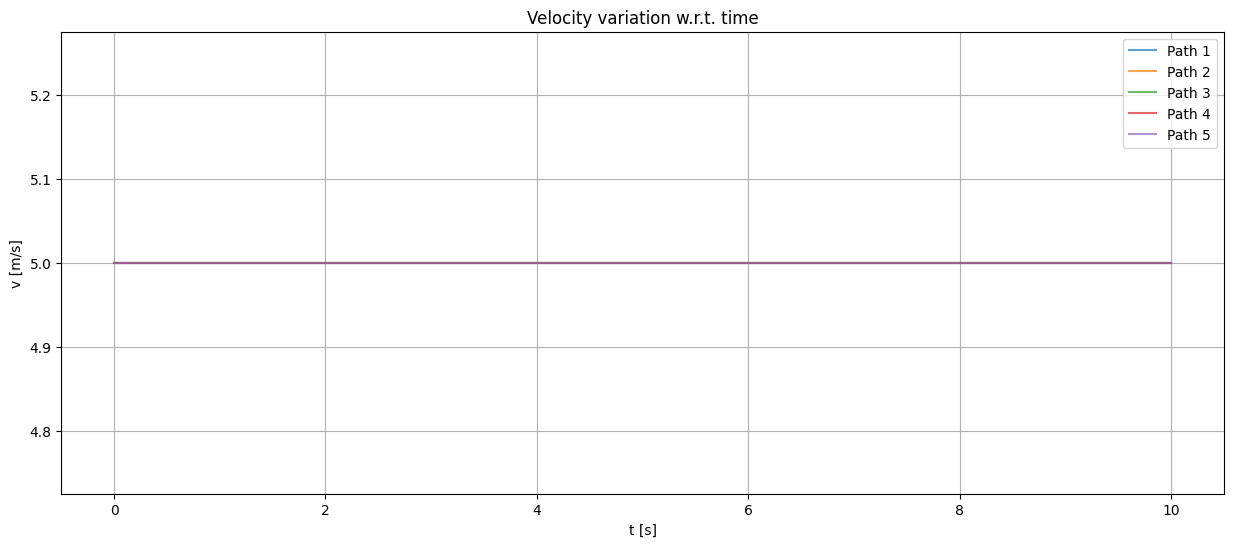

In [59]:
# Making 5 possible trajectories 
trajectories = []
for i in range (5):
    # Passed initial heading angle randomly (any angle b/w -90 to +90 degrees).
    # Passed acceleration; keeping acceleration constant for each trajectory, in a range of 0-2
    # Effect of acc. in the trajectory can be removed by making a = 0.0 
    # Initial delta can be any angle between -180 to +180 degrees.
    (x_traj, y_traj, θi, δi, a, v_traj) = start_trajectory(theta_init = 0.0, a = 0.0, delta_init = 0.0, v_init = 5, mode = "complex")
    trajectories.append((x_traj, y_traj, θi, δi, a, v_traj))

# Create a DataFrame for plotting
data = []
for i, (x_traj, y_traj, theta_init, delta_init, a, v_traj) in enumerate(trajectories):
    for x, y, v in zip(x_traj, y_traj, v_traj):
        data.append({"x": x, "y": y, "v": v, "path": f"Path {i+1}"})
df = pd.DataFrame(data)

# Creating the plot using plotly.
fig = px.line(df, x="x", y="y", color="path", custom_data=["v"], title="Complex Kinematic Bicycle Model with θi = 0, δi = 0, a = 0  <br>Steering angle ∈ [-π, +π]", render_mode="svg")
# Adding hover functionality
fig.update_traces(mode="markers+lines", hovertemplate="<br>".join([
    "v: %{customdata[0]:.2f}",
    "x: %{x:.2f}",
    "y: %{y:.2f}"
]))
fig.update_layout(height=600,width=1130)
fig.show()

# Using matplotlib
plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(x_traj, y_traj, label=f"Path {i+1}", alpha = 0.7)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.grid("True")
plt.title("Complex Kinematic Bicycle Model with θi = 0, δi = 0, a = 0 \n Steering angle ∈ [-π, +π]")
plt.legend()
plt.axis('equal')
plt.show()

# Using plt to show the velocity variation w.r.t. time :
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, v_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("v [m/s]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Velocity variation w.r.t. time")
plt.legend()
plt.show()

Making analytically more complex path, by introducing acceleration, initial heading and steering angle.
Complex Kinematic Bicycle Model with non-zero initial state : 
Trajectories with constant velocity, initial heading and steering angle as 0; 
But with complex kinematic_bicycle_model methods : kinematic_bicycle_model or kinematic_bicycle_model_w_slip

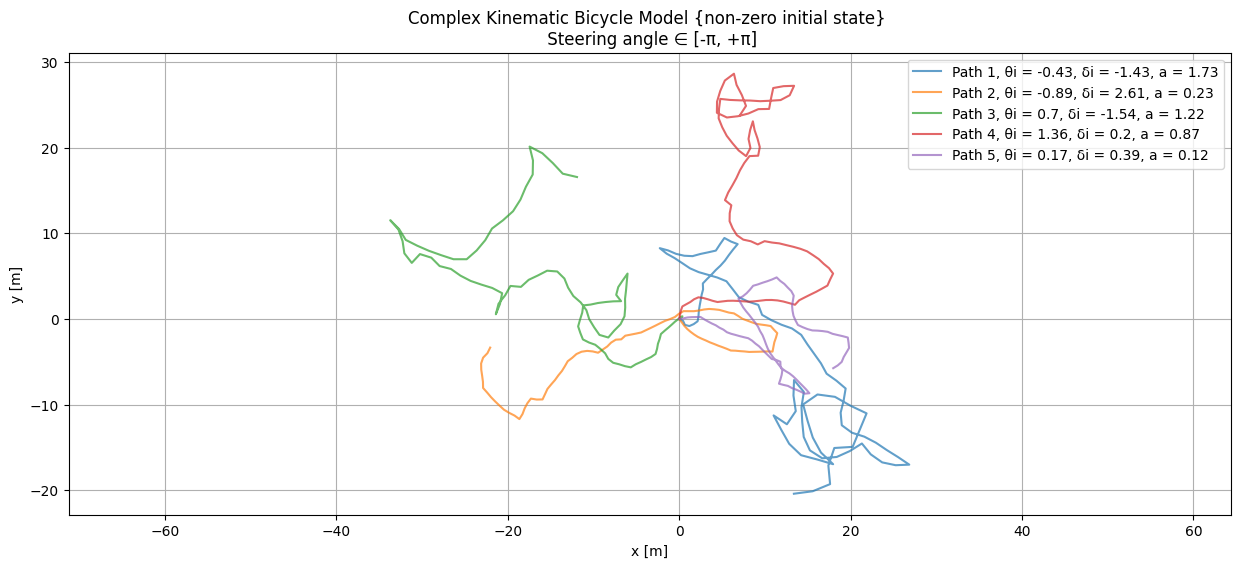

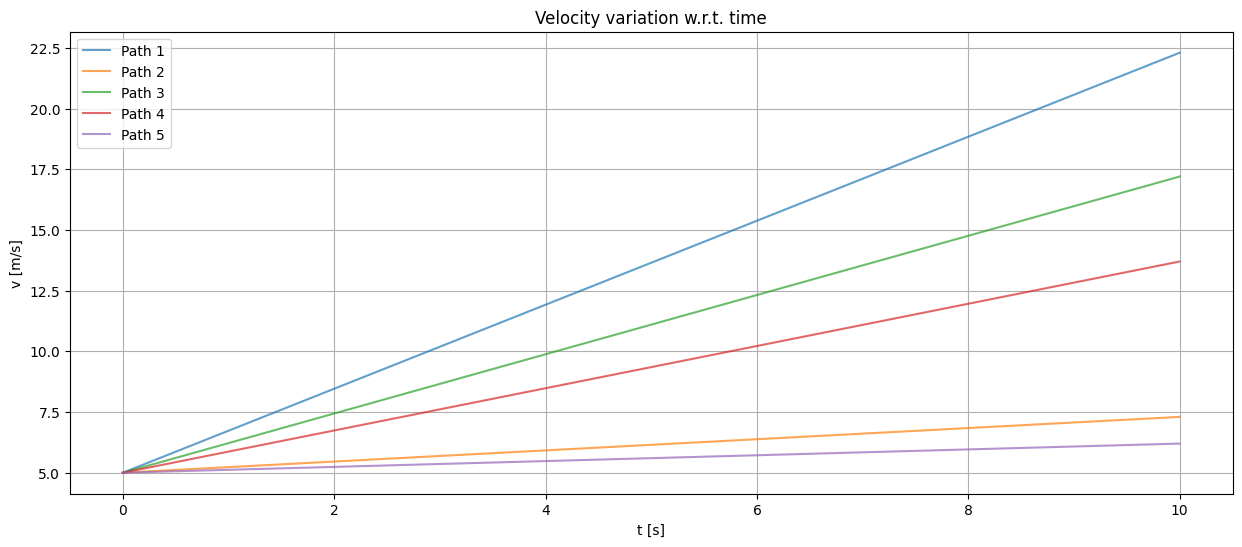

In [60]:
# Making 5 possible trajectories 
trajectories = []
for i in range (5):
    # Passed initial heading angle randomly (any angle b/w -90 to +90 degrees).
    # Passed acceleration; keeping acceleration constant for each trajectory, in a range of 0-2
    # Effect of acc. in the trajectory can be removed by making a = 0.0 
    # Initial delta can be any angle between -180 to +180 degrees.
    (x_traj, y_traj, θi, δi, a, v_traj) = start_trajectory(v_init = 5, theta_init = round(np.pi * random.uniform(-0.5, 0.5), 2), a = round(random.uniform(0, 2), 2), delta_init = round(np.pi * random.uniform(-1, 1), 2), mode = "complex")
    trajectories.append((x_traj, y_traj, θi, δi, a, v_traj))

# Create a DataFrame for plotting
data = []
for i, (x_traj, y_traj, theta_init, delta_init, a, v_traj) in enumerate(trajectories):
    for x, y, v in zip(x_traj, y_traj, v_traj):
        data.append({"x": x, "y": y, "v": v, "path": f"Path {i+1}"})
df = pd.DataFrame(data)

# Creating the plot using plotly.
fig = px.line(df, x="x", y="y", color="path", custom_data=["v"], title="Complex Kinematic Bicycle Model {non-zero initial state}  <br>Steering angle ∈ [-π, +π]", render_mode="svg")
# Adding hover functionality
fig.update_traces(mode="markers+lines", hovertemplate="<br>".join([
    "v: %{customdata[0]:.2f}",
    "x: %{x:.2f}",
    "y: %{y:.2f}"
]))
fig.update_layout(height=600,width=1130)
fig.show()

# Using matplotlib
plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(x_traj, y_traj, label=f"Path {i+1}, θi = {θi}, δi = {δi}, a = {a}", alpha = 0.7)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Complex Kinematic Bicycle Model {non-zero initial state} \n Steering angle ∈ [-π, +π]")
plt.grid("True")
plt.legend()
plt.axis('equal')
plt.show()

# Using plt to show the velocity variation w.r.t. time :
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, θi, δi, a, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, v_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("v [m/s]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Velocity variation w.r.t. time")
plt.legend()
plt.show()